In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 8))

In [27]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [21]:
area = plt.figure()

In [22]:
# primeiro gráfico
g1 = area.add_subplot(2, 2, 1) # 2 linhas, 2 colunas, posicao 1
g2 = area.add_subplot(2, 2, 2) 
g3 = area.add_subplot(2, 2, 3) 
g4 = area.add_subplot(2, 2, 4) # 2 linhas, 2 colunas, posicao 4

In [23]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Area')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
labels = grupo.mean().index
valores = grupo.mean().values

g4.bar(labels, valores)

<Container object of 5 artists>

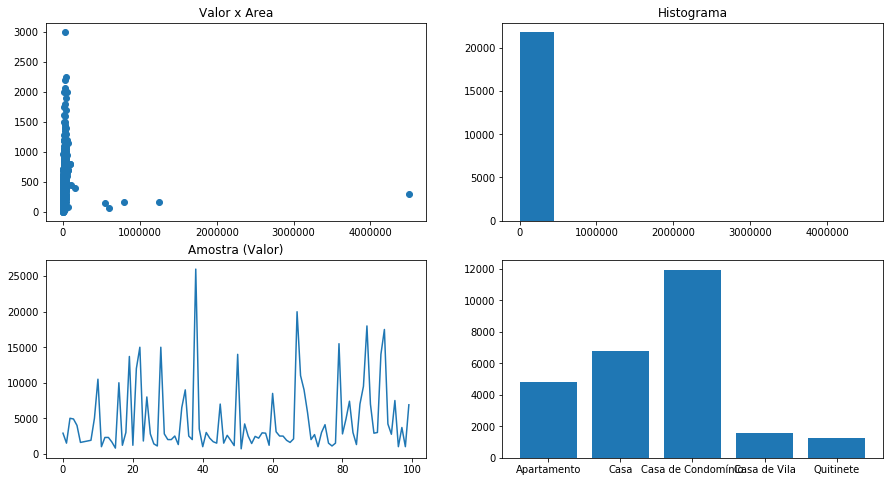

In [24]:
area

In [25]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

## Plotando gráfico de pizza

Text(0.5,1,'Total de Imóveis por Tipo')

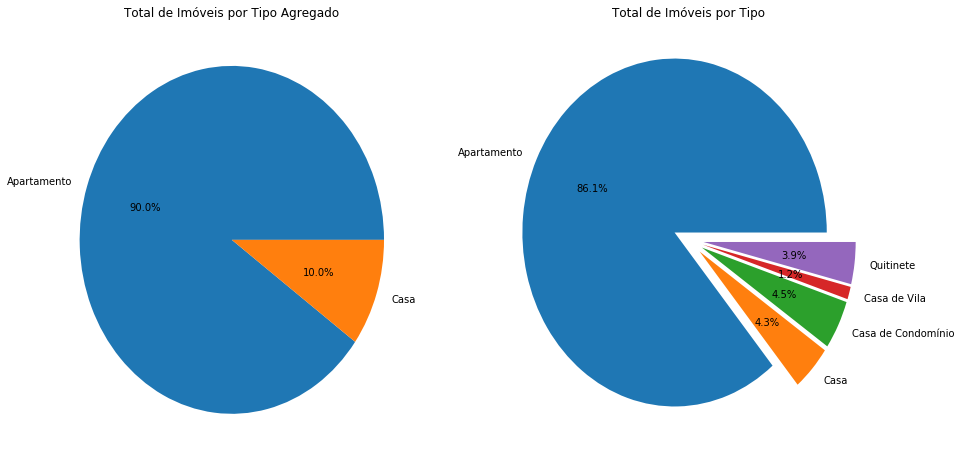

In [33]:
pizza = plt.figure()
graph1 = pizza.add_subplot(1, 2, 1)
graph2 = pizza.add_subplot(1, 2, 2)

grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values

graph1.pie(valores, labels= label, autopct="%1.1f%%")
graph1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values

graph2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
graph2.set_title('Total de Imóveis por Tipo')